## Thermometer of Cricket chirps

### Problem Statement: 
We will provide the number of cricket chirps in 15 seconds, and the machine needs to predict the current temperature. At the moment, we have 55 records where the corresponding temperature for 15 seconds of cricket chirps is given.

##### Importing Dependencies

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
tf.__version__

'2.18.0'

#### Data Ploting

In [3]:
# chirps per 15 seconds of the striped ground cricket
chirps_15s    = np.array([44.000,46.400,43.600,35.000,35.000,32.600,28.900,27.700,25.500,20.375,12.500,37.000,37.500,36.500,36.200,33.000,43.000,46.000,29.000,31.700,31.000,28.750,23.500,32.400,31.000,29.500,22.500,20.600,35.000,33.100,31.500,28.800,21.300,37.800,37.000,37.100,36.200,31.400,30.200,31.300,26.100,25.200,23.660,22.250,17.500,15.500,14.750,15.000,14.000,18.500,27.700,26.000,21.700,12.500,12.500],  dtype=float) 

# temperature in celsius 
temp_celsius = np.array([26.944, 25.833, 25.556, 23.056, 21.389, 20.000, 18.889, 18.333, 16.389, 13.889, 12.778, 24.583, 23.333, 23.333, 22.500, 18.889, 25.278, 25.833, 20.278, 20.278, 20.000, 18.889, 15.000, 21.111, 20.556, 19.444, 16.250, 14.722, 22.222, 21.667, 20.556, 19.167, 15.556, 23.889, 22.917, 22.500, 21.111, 19.722, 18.889, 20.556, 17.222, 17.222, 16.111, 16.667, 13.611, 12.778, 11.111, 11.667, 10.000, 11.111, 18.333, 17.222, 15.000, 10.417, 9.5833],  dtype=float) 


In [4]:
# print the data 
for i, c in enumerate(chirps_15s):
    print(f"{chirps_15s[i]} chirps in 15 seconds -> {temp_celsius[i]} celsius")

44.0 chirps in 15 seconds -> 26.944 celsius
46.4 chirps in 15 seconds -> 25.833 celsius
43.6 chirps in 15 seconds -> 25.556 celsius
35.0 chirps in 15 seconds -> 23.056 celsius
35.0 chirps in 15 seconds -> 21.389 celsius
32.6 chirps in 15 seconds -> 20.0 celsius
28.9 chirps in 15 seconds -> 18.889 celsius
27.7 chirps in 15 seconds -> 18.333 celsius
25.5 chirps in 15 seconds -> 16.389 celsius
20.375 chirps in 15 seconds -> 13.889 celsius
12.5 chirps in 15 seconds -> 12.778 celsius
37.0 chirps in 15 seconds -> 24.583 celsius
37.5 chirps in 15 seconds -> 23.333 celsius
36.5 chirps in 15 seconds -> 23.333 celsius
36.2 chirps in 15 seconds -> 22.5 celsius
33.0 chirps in 15 seconds -> 18.889 celsius
43.0 chirps in 15 seconds -> 25.278 celsius
46.0 chirps in 15 seconds -> 25.833 celsius
29.0 chirps in 15 seconds -> 20.278 celsius
31.7 chirps in 15 seconds -> 20.278 celsius
31.0 chirps in 15 seconds -> 20.0 celsius
28.75 chirps in 15 seconds -> 18.889 celsius
23.5 chirps in 15 seconds -> 15.0 c

#### Data Visualization

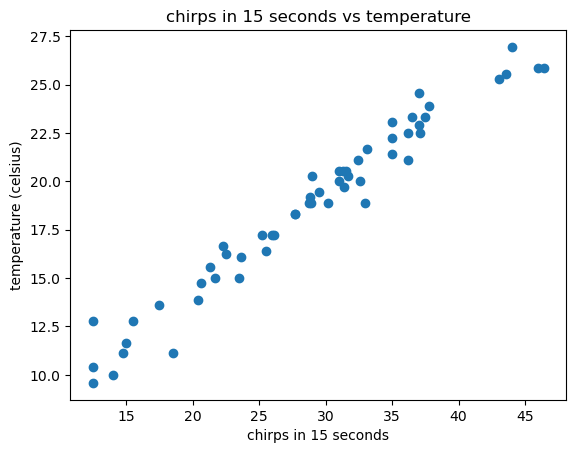

In [5]:
import matplotlib.pyplot as plt

X = chirps_15s
y = temp_celsius

plt.scatter(X, y)
plt.xlabel("chirps in 15 seconds")
plt.ylabel("temperature (celsius)")
plt.title("chirps in 15 seconds vs temperature")
plt.show()

#### Y = mx + b ; m, b Calculation

In [7]:
from statistics import mean

def best_fit_slope_and_intercept(X, y):
    m = (((mean(X) * mean(y)) - mean(X * y)) /
         ((mean(X) * mean(X)) - mean(X * X)))
    
    b = mean(y) - m * mean(X)

    return m, b

m,b = best_fit_slope_and_intercept(X, y)
print(f"Slope {m}")
print(f"Intercept {b}")
print(f"Equation of line: y = {m}X + {b}")



Slope 0.49543811977958857
Intercept 4.458638516454446
Equation of line: y = 0.49543811977958857X + 4.458638516454446


#### Best Fit Line

Text(0.5, 1.0, 'chirps in 15 seconds vs temperature')

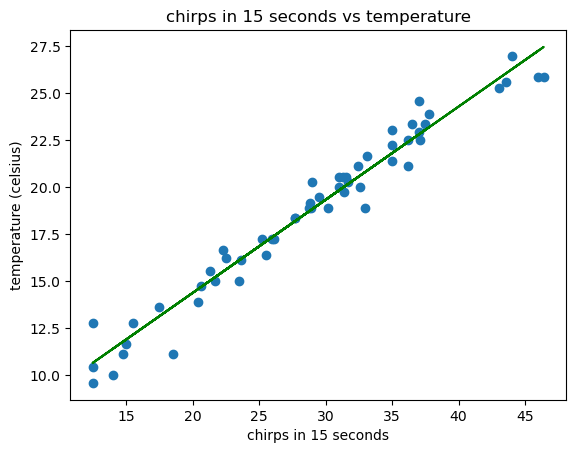

In [10]:
regression_line = []
for x in X:
    regression_line.append((m*x)+b) # append the y value for each x value 
plt.scatter(X, y)
plt.plot(X, regression_line, color='g')
plt.xlabel("chirps in 15 seconds")
plt.ylabel("temperature (celsius)")
plt.title("chirps in 15 seconds vs temperature")

#### Simple model of Deep Learning

In [11]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
# units = 1 because we want to predict a single value
# input_shape = 1 because we have a single feature

/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model = tf.keras.Sequential([l0])
# Sequential model is a linear stack of layers that work sequentially, process is take a single input and produce a single output

# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(units=1, input_shape=[1])
# ])

In [13]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
# loss function is mean squared error
# optimizer is Adam with learning rate 0.1
# Adam(Adaptive Moment Estimation) is a popular optimization algorithm that is an extension of the stochastic gradient descent
# Adaptive Moment Estimation means that the algorithm uses both the first and second moments of the gradients to adapt the learning rate for each weight of the neural network 

#### Model Training

In [14]:
history = model.fit(X, y, epochs=500, verbose=True)
# epochs is the number of times the model will cycle through the data
# verbose = True means that we will see the output of the training process

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 461.5012 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 240.9003
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 90.1849 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 18.1173
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.2540
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 23.3671
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 51.2714
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 58.2677
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 53.4889
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 39.7560
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 21.0119
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.6450
Epoch 13/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8466
Epoch 14/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.8905
Epoch 15/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.7906
Epoch

### Train Loss Graph

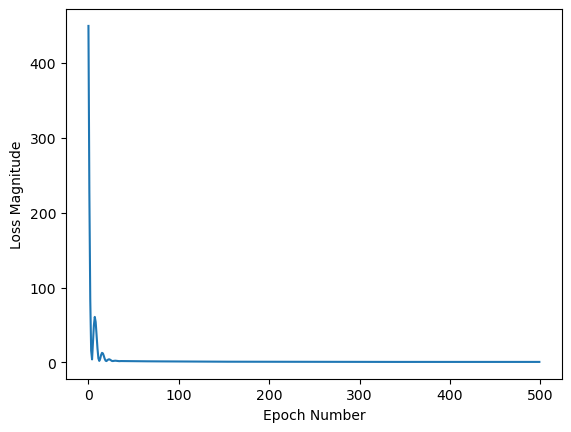

In [15]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
# history.history is a dictionary that stores the loss values for each epoch

#### Prediction

In [19]:
import numpy as np

# Reshape the input into a 2D array
chirps = np.array([34]).reshape(1, -1)

# Predict the temperature
print(model.predict(chirps))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[21.42188]]


In [20]:
l0.get_weights()
# The first element is the slope and the second element is the intercept

[array([[0.4998882]], dtype=float32), array([4.4256825], dtype=float32)]